# 2. Degree correlations and assortativity

In this problem, we consider degree correlations and assortativity of two real-world networks:
- the Zachary karate club network (`karate_club_network_edge_file.edg`)
- a snowball-sampled subgraph of a Facebook friendships network (`facebook-wosn-links_subgraph.edg`). 

For both networks, perform the following analyses:

### a) Create a scatter plot of the degrees of pairs of connected nodes. 

That is, take
- each connected pair of nodes $(i,j)$, 
- take their degrees $k_i$ and $k_j$ , 
- plot the point ($k_i$ , $k_j$ ) on two axes with degrees as their units, and 
- repeat for all pairs of connected nodes. 

Because
the network is undirected, the plot should be symmetrical, containing points ($k_i$ , $k_j$ ) and
($k_j$ , $k_i$ ) for all connected pairs ($i,j$).

In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

from degree_correlations_assortativity import create_scatter, create_heatmap, visualize_nearest_neighbor_degree
from degree_correlations_assortativity import get_x_and_y_degrees
from degree_correlations_assortativity import assortativity
from degree_correlations_assortativity import get_nearest_neighbor_degree
from degree_correlations_assortativity import get_simple_bin_average

%matplotlib inline

In [2]:
import os
if not os.path.isdir("image_2"):
    os.makedirs("image_2")

In [3]:
#TODO: set network paths and names properly
# see documentation of the functions where these variables are used
# for the details of these variables
network_paths = ['./data/karate_club_network_edge_file.edg', './data/facebook-wosn-links_subgraph.edg']
network_names = ['karate', 'facebook']
network_titles = ['Karate Club Network', 'Facebook Friendship Network']
# network_name and .pdf extension are added after figure_base variables when saving the figures
scatter_figure_base = './image_2/edge_degree_correlation_scatter_'
heatmap_figure_base = './image_2/heatmap_' # replace, where to save the heatmaps
nearest_neighbor_figure_base = './image_2/nearest_' # replace, where to save nearest neighbor figures

Own assortativity for Karate Club Network: -0.47136675756640545
NetworkX assortativity for Karate Club Network: -0.47561309768461457


/home/adam/Desktop/work/complex-networks/week6/code/degree_correlations_assortativity.py:224: RuntimeWarning: invalid value encountered in double_scalars
  bin_average[i] = bin_average[i]/denominator


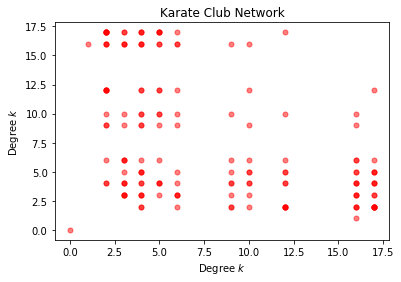

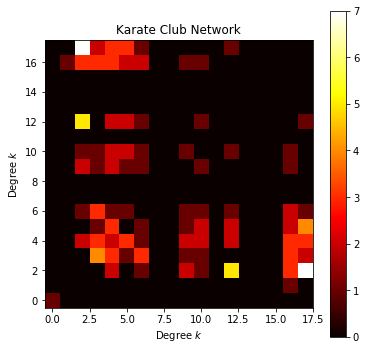

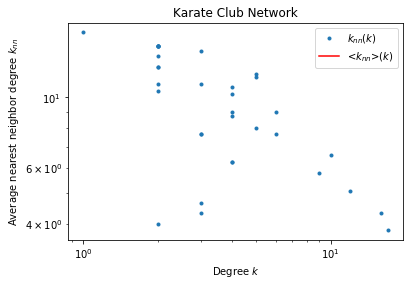

Own assortativity for Facebook Friendship Network: 0.05596269693739395
NetworkX assortativity for Facebook Friendship Network: 0.05598478476593048


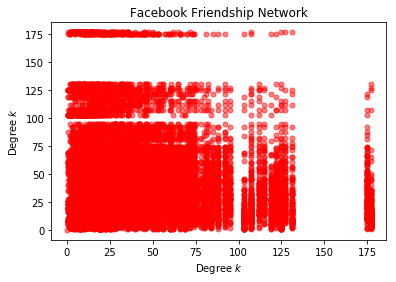

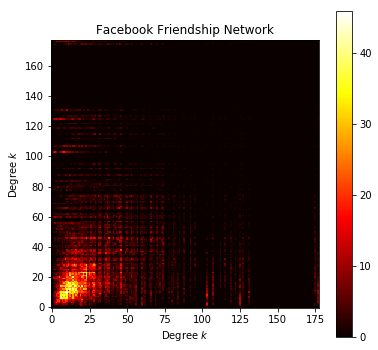

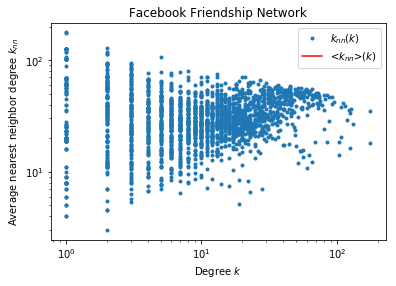

In [4]:
# Loop through all networks
for network_path, network_name, network_title in zip(network_paths, network_names, network_titles):
    network = nx.read_weighted_edgelist(network_path)
    x_degrees, y_degrees = get_x_and_y_degrees(network)

    fig = create_scatter(x_degrees, y_degrees, network_title)
    fig.savefig(scatter_figure_base+network_name+'.pdf')

    fig = create_heatmap(x_degrees, y_degrees, network_title)
    fig.savefig(heatmap_figure_base+network_name+'.pdf')

    # assortativities
    assortativity_own = assortativity(x_degrees, y_degrees)
    assortativity_nx = nx.degree_assortativity_coefficient(network)
    print("Own assortativity for " + network_title + ": " +
          str(assortativity_own))
    print("NetworkX assortativity for " + network_title + ": " +
          str(assortativity_nx))

    # nearest neighbor degrees
    degrees, nearest_neighbor_degrees = get_nearest_neighbor_degree(network)
    unique_degrees, mean_nearest_neighbor_degrees = get_simple_bin_average(degrees,
                                                                           nearest_neighbor_degrees)
    fig = visualize_nearest_neighbor_degree(degrees,
                                            nearest_neighbor_degrees,
                                            unique_degrees,
                                            mean_nearest_neighbor_degrees,
                                            network_title)
    fig.savefig(nearest_neighbor_figure_base + network_name + '.pdf')
    plt.show()

### b) Produce a heat map 1 of the degrees of all connected nodes.

The heat map uses
the same information as you used in a), that is, the degrees of pairs of connected nodes.
However, no points are plotted: rather, the two degree axes are binned and the number
of degree pairs ($k_i$ , $k_j$ ) in each bin is computed. Then, the bin is colored according to this
number (e.g., red = many connected pairs of nodes with degrees falling in the bin). 

- What extra information do you gain by using a heatmap instead of just a scatter plot (if any)?

**Ans.** We can observe a sort of decay (spread)

### c) 

The assortativity coefficient is defined as the Pearson correlation coefficient of the
degrees of pairs of connected nodes. Calculate the assortativity coefficient of the
network using `scipy.stats.pearsonr` and compare your result with the output of `NetworkX` function `degree_assortativity_coefficient`. As mentioned in the lecture, social
networks typically are assortative. 

**Ans.**
Karate Club Network
- Own assortativity for Karate Club Network: -0.47136675756640545
- NetworkX assortativity for Karate Club Network: -0.47561309768461457

Facebook Friendship Network
- Own assortativity for Facebook Friendship Network: 0.05596269693739395
- NetworkX assortativity for Facebook Friendship Network: 0.05598478476593048

### Does this hold for these two social networks? What could explain this result?

### d) For each node, compute the average nearest neighbour degree $k_{nn}$ and
make a scatter plot of $k _{nn}$ as a function of $k$. In the same plot, plot also the curve
of $\langle k_{nn} \rangle (k)$ as a function of $k$, i.e. the averaged $k_{nn}$ for each $k$. Comment the result
from the viewpoint of assortativity.

**Ans.** Particularly for a larger network such as the facebook friendship network, with a larger degree, we can be more confident that it's neighbours also has a large degree.

This means that high-degree nodes link to other high-degree nodes.

We can explain this through homophily, where people tend to form social ties to others like them.

# 3 Bipartite networks

Consider the bipartite network of actors and movies shown in Figure 3.

![alt text](./assets/fig3.png "A small undirected network.")

### a) Construct the two unipartite projections of the network – the network of actors and the network of movies.
In the former, actors are linked if they have acted together
in at least one movie, and in the latter, movies are linked if there is at least one common
actor.



In [5]:
from networkx.algorithms import bipartite

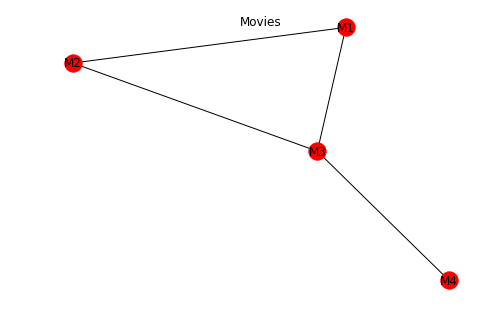

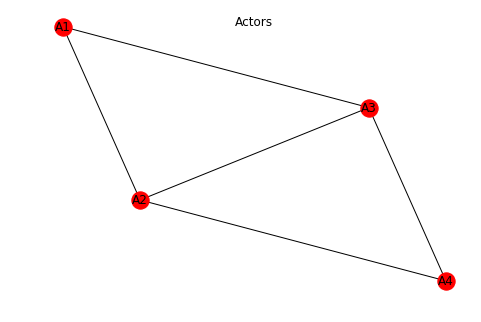

In [6]:
fig = nx.Graph()

fig.add_nodes_from(['M1', 'M2', 'M3', 'M4'], bipartite=0)
fig.add_nodes_from(['A1', 'A2', 'A3', 'A4'], bipartite=1)

fig.add_edges_from([('M1', 'A1'), ('M1', 'A2'),
                    ('M2', 'A1'), ('M2', 'A3'),                    
                    ('M3', 'A2'), ('M3', 'A3'),  
                    ('M3', 'A4'), ('M4', 'A4')])

movies, actors = bipartite.sets(fig)

plt.suptitle("Movies")
nx.draw(bipartite.projected_graph(B=fig, nodes=movies), with_labels=True)
plt.show()

plt.suptitle("Actors")
nx.draw(bipartite.projected_graph(B=fig, nodes=actors), with_labels=True)
plt.show()

### b) Show that, in general, it is not possible to uniquely reconstruct a bipartite network from its two unipartite projections. 

Prove this by providing a counterexample: Take
the same 4 actors and 4 movies, and design a different bipartite network that has exactly
the same unipartite projections. That is, connect the actors and movies in some way that
results in the same projections as in a).

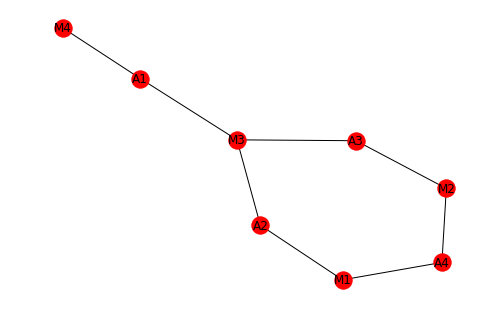

In [7]:
fig2 = nx.Graph()

fig2.add_nodes_from(['M1', 'M2', 'M3', 'M4'], bipartite=0)
fig2.add_nodes_from(['A1', 'A2', 'A3', 'A4'], bipartite=1)

fig2.add_edges_from([('M1', 'A4'), ('M1', 'A2'),
                    ('M2', 'A4'), ('M2', 'A3'),                    
                    ('M3', 'A2'), ('M3', 'A3'),  
                    ('M3', 'A1'), ('M4', 'A1')])

nx.draw(fig2, with_labels=True)

Here, we have a different bipartite graphs, however, as shown below, with the same unipartite graphs as our first bipartite graph

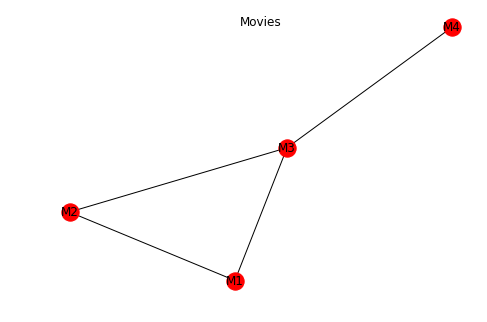

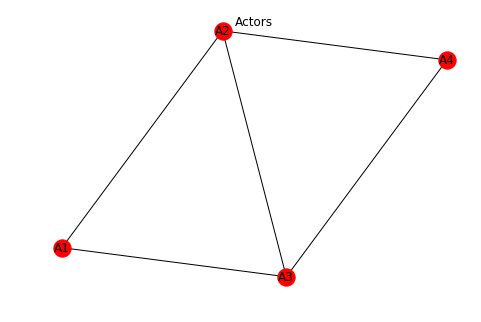

In [8]:
plt.suptitle("Movies")
nx.draw(bipartite.projected_graph(B=fig2, nodes=movies), with_labels=True)
plt.show()

plt.suptitle("Actors")
nx.draw(bipartite.projected_graph(B=fig, nodes=actors), with_labels=True)
plt.show()